## Experiment-3

In the experiment 3, hyper-parameter tuning in random forest has to be taken for analysying the variation with and without tuning.

In [46]:
import pandas as pd
import numpy as np
import os
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
dataset=pd.read_csv('Research_Article_train.csv')
#dataset.head(15)

dataset.head(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,1 .what Reconstructing Subject-Specific Effect...,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [3]:
dataset.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [4]:
y=dataset[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

In [5]:
#combining 2 text columns title and abstract into one and drop columns title and abstract
dataset['Text']=dataset['TITLE']+' '+dataset['ABSTRACT']
dataset.drop(columns=['TITLE','ABSTRACT'], inplace=True)
#dataset.head(5)

In [6]:
#Remove Punctuation
remove_punc = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', remove_punc))

dataset["Text"] = dataset["Text"].apply(lambda text: remove_punctuation(text))

In [7]:
stopword = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopword])

In [8]:
#stopwords removal
dataset["Text"] = dataset["Text"].apply(lambda x: remove_stopwords(x))

In [9]:
dataset.head(5)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Text
0,1,1,0,0,0,0,0,1 Reconstructing SubjectSpecific Effect Maps P...
1,2,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation in...
2,3,0,0,1,0,0,0,Spherical polyharmonics Poisson kernels polyha...
3,4,0,0,1,0,0,0,A finite element approximation stochastic Maxw...
4,5,1,0,0,1,0,0,Comparative study Discrete Wavelet Transforms ...


In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    lem_text=" ".join([lemmatizer.lemmatize(i) for i in text.split()])
    return lem_text

In [11]:
#lemmatisation
dataset["Text"] = dataset["Text"].apply(lambda text: lemmatize_words(text))

In [12]:
dataset.head(5)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Text
0,1,1,0,0,0,0,0,1 Reconstructing SubjectSpecific Effect Maps P...
1,2,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation in...
2,3,0,0,1,0,0,0,Spherical polyharmonics Poisson kernel polyhar...
3,4,0,0,1,0,0,0,A finite element approximation stochastic Maxw...
4,5,1,0,0,1,0,0,Comparative study Discrete Wavelet Transforms ...


In [13]:
#Instantiate tokenizer
tokenizer=RegexpTokenizer(r'\w+')

dataset["Text"] = dataset["Text"].apply(lambda x: tokenizer.tokenize(x.lower()))

In [14]:
#dataset.head(5)

In [15]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])

In [16]:
#stemming
dataset["Text"] = dataset["Text"].apply(lambda text: stem_words(text))

In [47]:
# Remove Stop Words
dataset["Text"] = dataset["Text"].apply(lambda text: remove_stopwords(text))
#data_words_nostops
#Remove Numbers
dataset['Text'] =dataset["Text"].str.replace('\d+', '')

In [18]:
dataset.head(5)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Text
0,1,1,0,0,0,0,0,reconstruct subjectspecif effect map predict ...
1,2,1,0,0,0,0,0,rotat invari neural network rotat invari trans...
2,3,0,0,1,0,0,0,spheric polyharmon poisson kernel polyharmon f...
3,4,0,0,1,0,0,0,finit element approxim stochast maxwelllandaul...
4,5,1,0,0,1,0,0,compar studi discret wavelet transform wavelet...


In [ ]:
# You can still get n-grams here
vectorizer = TfidfVectorizer(analyzer='word',max_features=10000,min_df=5, max_df=0.9, token_pattern = '(\S+)')
X2 = vectorizer.fit_transform(dataset['Text'])
#X2= (X2.toarray())


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.20,random_state=0)

## Build the model without hyper parameter tuning

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfclassifier=RandomForestClassifier(n_estimators=200)

In [23]:
rfclassifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [24]:
prediction=rfclassifier.predict(X_test)
prediction

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
# View accuracy score
accuracy_score(y_test, prediction)


0.5923718712753278

## Hyper parameter tuning with GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
#%%capture
# define the grid
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfclassifier, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
# fit the model
gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 167.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 232.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             verbose=1)

In [30]:
gridF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 800}

Based on the parameter which is passed while tuning the best parameters are shown above, but the accuracy became 0.53 after passing these parameters in the Random Forest model. So, the n_estimators increased from 800 to 1500 and max_depth from 30 to 100 gives better accuracy. 

In [37]:
forestVC = RandomForestClassifier(random_state = 1,
                                  n_estimators = 1500,
                                  max_depth = 100, 
                                  min_samples_split = 5,  min_samples_leaf = 1) 
modelVC = forestVC.fit(X_train, y_train) 
y_predVC = modelVC.predict(X_test)

In [38]:
y_predVC

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
# View accuracy score
accuracy_score(y_test, y_predVC)

0.5935637663885578

After doing hyperparameter the tuning random forest the accuracy is increased by 0.001%

In [41]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test,y_predVC))

[[[2079  372]
  [ 288 1456]]

 [[2959   40]
  [ 353  843]]

 [[3047   73]
  [ 364  711]]

 [[3067  102]
  [ 550  476]]

 [[4079    0]
  [ 116    0]]

 [[4145    0]
  [  50    0]]]


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

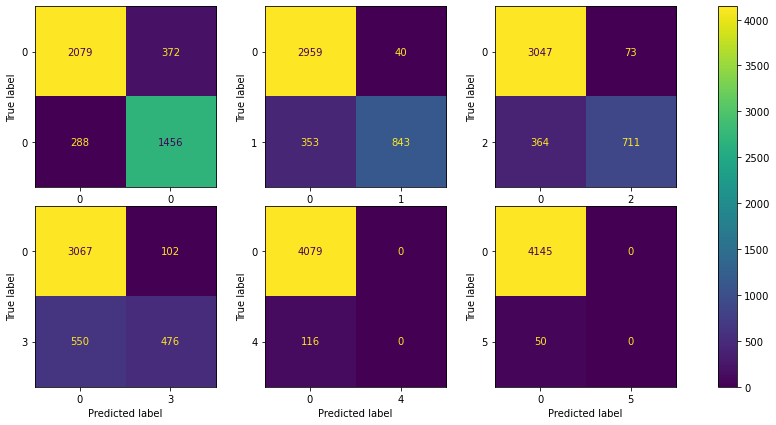

In [44]:
ytest=y_test.values 
f, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(ytest[:, i],y_predVC[:, i]),display_labels=[0, i])
                                  
    disp.plot(ax=axes[i], values_format='.4g')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predVC))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1744
           1       0.95      0.70      0.81      1196
           2       0.91      0.66      0.76      1075
           3       0.82      0.46      0.59      1026
           4       0.00      0.00      0.00       116
           5       0.00      0.00      0.00        50

   micro avg       0.86      0.67      0.75      5207
   macro avg       0.58      0.44      0.50      5207
weighted avg       0.84      0.67      0.73      5207
 samples avg       0.75      0.71      0.71      5207

